# 1. Import Libraries & Install Dependencies

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn cho Machine Learning
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sklearn cho Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Sklearn cho Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sklearn cho Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
!pip install adjustText
from adjustText import adjust_text # Import the library


# 2. Import Data & Basic Info

In [6]:
# BƯỚC 2: IMPORT DATA & KIỂM TRA CƠ BẢN

# 1. Đọc dữ liệu
import pandas as pd

file_path = r'/content/drive/MyDrive/FPT Material + Study/Sem 4/AIL303m/Project/Data_submission.xlsx'  # Hoặc đường dẫn đầy đủ nếu ngoài cùng thư mục
df = pd.read_excel(file_path)


In [7]:
df.head(10)

,Year,US_import,Ln(US_import),GDP_US_2021,Ln(GDP_US),GDP_VN_2021,Ln(GDP_VN),MFN_simple,Distance,Ln(Distance),BTA
0,1994,54614670,17.815813,46537.357146,10.748011,3089.609337,8.035800,6.45,17058,9.744375,0
1,1995,210019380,19.162710,47220.957961,10.762593,3328.214860,8.110191,6.52,17058,9.744375,0
2,1996,341684510,19.649398,48435.700102,10.787992,3584.028983,8.184243,6.56,17058,9.744375,0
3,1997,412600550,19.837990,49984.269650,10.819464,3820.302495,8.248085,6.14,17058,9.744375,0
4,1998,596040790,20.205820,51619.869834,10.851662,3982.958060,8.289780,6.01,17058,9.744375,0
5,1999,654818440,20.299869,53474.045430,10.886952,4119.053672,8.323379,5.89,17058,9.744375,0
6,2000,821430460,20.526558,55038.622496,10.915790,4349.223488,8.377753,5.88,17058,9.744375,0
7,2001,1052858980,20.774775,55017.304978,10.915403,4570.268466,8.427327,6.21,17058,9.744375,0
8,2002,2584729540,21.672887,55436.116979,10.922987,4809.621511,8.478374,5.97,17058,9.744375,1
9,2003,4909551800,22.314448,56498.207831,10.941964,5090.289909,8.535090,5.44,17058,9.744375,1


In [8]:
df.tail(10)

,Year,US_import,Ln(US_import),GDP_US_2021,Ln(GDP_US),GDP_VN_2021,Ln(GDP_VN),MFN_simple,Distance,Ln(Distance),BTA
21,2015,39692685560,24.404433,64575.408187,11.075589,9248.023961,9.132165,4.01,17023,9.742321,1
22,2016,43747875470,24.501709,65275.571818,11.086373,9743.188223,9.184324,3.98,17023,9.742321,1
23,2017,48421110340,24.603202,66458.023373,11.104326,10290.548714,9.238981,5.23,17023,9.742321,1
24,2018,51277489490,24.660518,68070.213422,11.128295,10936.893786,9.299897,5.34,17023,9.742321,1
25,2019,69385153230,24.962939,69511.763441,11.149251,11628.613915,9.361224,3.86,17023,9.742321,1
26,2020,83211920320,25.144656,67352.387139,11.117694,11851.396569,9.380201,3.78,17013,9.741733,1
27,2021,108195516670,25.407206,71318.307359,11.174908,12048.901994,9.396729,3.79,17013,9.741733,1
28,2022,135876540950,25.635013,72841.924313,11.196047,12930.256219,9.467325,3.70,17013,9.741733,1
29,2023,136600000000,25.640323,74577.506540,11.219594,13491.879417,9.509843,3.73,17013,9.741733,1
30,2024,142480000000,25.682467,75052.000000,11.225936,13575.000000,9.515985,3.71,17013,9.741733,1


In [9]:
df.columns

Index(['Year', 'US_import', 'Ln(US_import)', 'GDP_US_2021', 'Ln(GDP_US)',
       'GDP_VN_2021', 'Ln(GDP_VN)', 'MFN_simple', 'Distance', 'Ln(Distance)',
       'BTA'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           31 non-null     int64  
 1   US_import      31 non-null     int64  
 2   Ln(US_import)  31 non-null     float64
 3   GDP_US_2021    31 non-null     float64
 4   Ln(GDP_US)     31 non-null     float64
 5   GDP_VN_2021    31 non-null     float64
 6   Ln(GDP_VN)     31 non-null     float64
 7   MFN_simple     31 non-null     float64
 8   Distance       31 non-null     int64  
 9   Ln(Distance)   31 non-null     float64
 10  BTA            31 non-null     int64  
dtypes: float64(7), int64(4)
memory usage: 2.8 KB


### 📊 MÔ TẢ CÁC CỘT DỮ LIỆU

| **Tên cột**          | **Mô tả**                                                                 | **Đơn vị / Ghi chú**                                                     |
|----------------------|---------------------------------------------------------------------------|--------------------------------------------------------------------------|
| `Year`               | Năm thống kê dữ liệu.                                                     | Từ 1994 đến 2024.                                                        |
| `US_import`          | Giá trị nhập khẩu từ Việt Nam vào Mỹ.                                     | Đơn vị: USD (giá trị danh nghĩa hằng năm).                              |
| `Ln(US_import)`      | Log tự nhiên của `US_import`.                                             | Dùng để phân tích tuyến tính, loại bỏ scale lớn.                        |
| `GDP_US_2021`        | GDP bình quân đầu người của Mỹ quy đổi về mức giá năm 2021.               | Đơn vị: USD/người.                                                       |
| `Ln(GDP_US)`         | Log tự nhiên của `GDP_US_2021`.                                           | Dùng để kiểm tra mối quan hệ phi tuyến.                                 |
| `GDP_VN_2021`        | GDP bình quân đầu người của Việt Nam quy đổi về mức giá năm 2021.         | Đơn vị: USD/người.                                                       |
| `Ln(GDP_VN)`         | Log tự nhiên của `GDP_VN_2021`.                                           | Được sử dụng để tuyến tính hóa dữ liệu GDP.                             |
| `MFN_simple`         | Mức thuế suất tối huệ quốc (MFN) đơn giản mà Mỹ áp với Việt Nam.         | Đơn vị: %, phản ánh mức thuế nhập khẩu.                                 |
| `Distance`           | Khoảng cách địa lý giữa Việt Nam và Mỹ (có thể giữa thủ đô hai nước).    | Đơn vị: km.                                                              |
| `Ln(Distance)`       | Log tự nhiên của `Distance`.                                              | Dùng cho mô hình hấp dẫn (gravity model).                               |
| `BTA`                | Hiệp định thương mại song phương (Bilateral Trade Agreement).             | Giá trị nhị phân: `0` nếu chưa có BTA, `1` nếu đã ký (sau năm 2001).    |


# 3. Data Wrangling

## 3.1 Handling missing values

In [11]:
df.isnull().sum()

,0
Year,0
US_import,0
Ln(US_import),0
GDP_US_2021,0
Ln(GDP_US),0
GDP_VN_2021,0
Ln(GDP_VN),0
MFN_simple,0
Distance,0
Ln(Distance),0


## 3.2. Handling Duplicated Values

In [12]:
# Số lượng dòng trùng lặp hoàn toàn
duplicates = df.duplicated()
print("Số dòng trùng lặp hoàn toàn:", duplicates.sum())

Số dòng trùng lặp hoàn toàn: 0


## 3.3. Data Formatting

In [13]:
df['BTA'] = df['BTA'].astype('category')

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['Year', 'US_import', 'Ln(US_import)', 'GDP_US_2021', 'Ln(GDP_US)', 'GDP_VN_2021', 'Ln(GDP_VN)', 'MFN_simple', 'Distance', 'Ln(Distance)']
Categorical columns: ['BTA']


# 4. EDA (Exploratory Data Analysis)

## 4.1. Descriptive Statistics

In [14]:
# Thống kê mô tả cho các biến số dạng số
df.describe()

,Year,US_import,Ln(US_import),GDP_US_2021,Ln(GDP_US),GDP_VN_2021,Ln(GDP_VN),MFN_simple,Distance,Ln(Distance)
count,31.000000,3.100000e+01,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2009.000000,3.369919e+10,22.900031,60649.283309,11.004768,7540.622534,8.832505,4.902258,17039.451613,9.743286
std,9.092121,4.380575e+10,2.160797,7783.248024,0.129999,3274.745037,0.451679,0.964727,17.272017,0.001014
min,1994.000000,5.461467e+07,17.815813,46537.357146,10.748011,3089.609337,8.035800,3.700000,17013.000000,9.741733
25%,2001.500000,1.818794e+09,21.223831,55237.369738,10.919389,4689.944988,8.452850,4.010000,17023.000000,9.742321
50%,2009.000000,1.385363e+10,23.351813,60676.565569,11.013313,6914.338636,8.841353,4.700000,17046.000000,9.743671
75%,2016.500000,4.608449e+10,24.552455,65866.797596,11.095349,10016.868469,9.211652,5.885000,17058.000000,9.744375
max,2024.000000,1.424800e+11,25.682467,75052.000000,11.225936,13575.000000,9.515985,6.560000,17058.000000,9.744375


In [15]:
# Thống kê mô tả cho biến phân loại (categorical), ví dụ: BTA
df.describe(include='category')  # nếu cột kiểu object (chuỗi)

,BTA
count,31
unique,2
top,1
freq,23


## 4.2. Heatmap

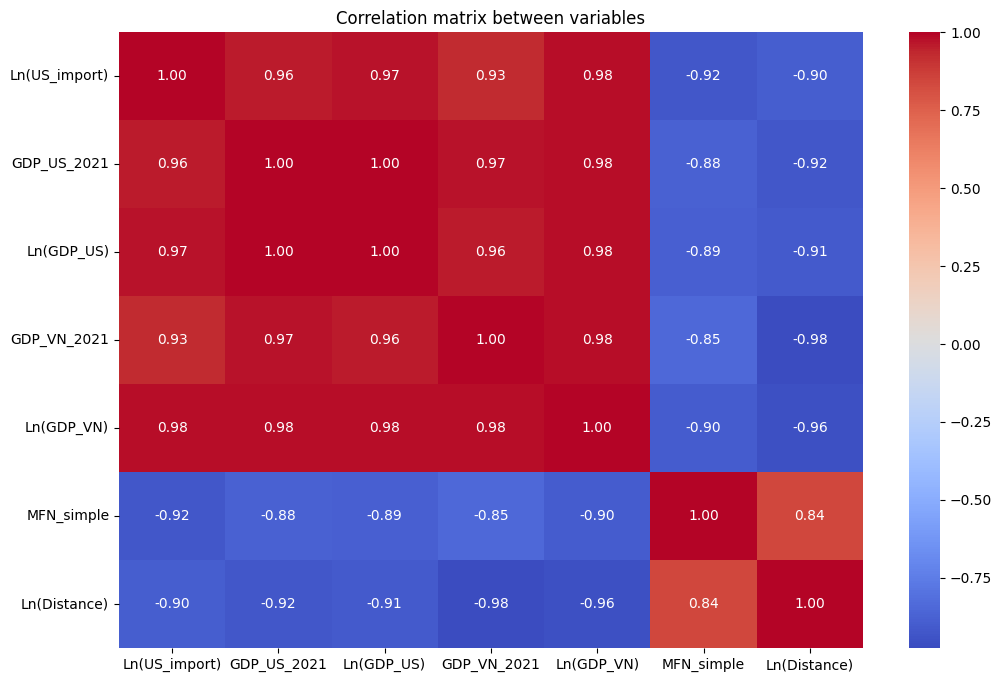

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lọc các cột số
numerical_cols = df.select_dtypes(include=['float64']).columns

# Tính ma trận tương quan
correlation_matrix = df[numerical_cols].corr()

# Vẽ heatmap tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation matrix between variables")
plt.show()

## 4.3. Scatter plot between US-GDP and US-import

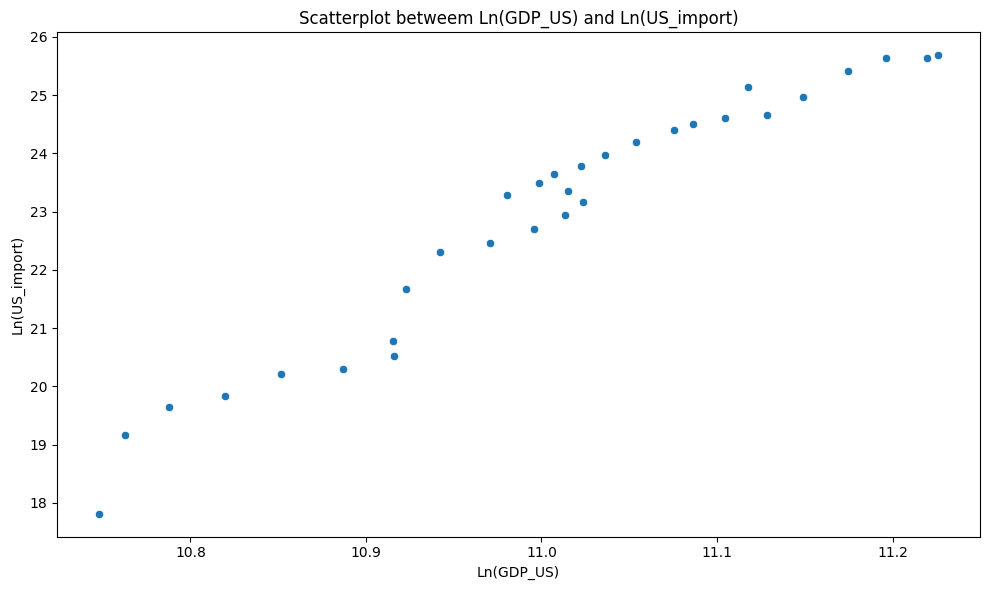

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ln(GDP_US)', y='Ln(US_import)')

plt.title("Scatterplot betweem Ln(GDP_US) and Ln(US_import)")
plt.xlabel("Ln(GDP_US)")
plt.ylabel("Ln(US_import)")
plt.tight_layout()
plt.show()

## 4.4. Distribution of Original and Log-Transformed Variables

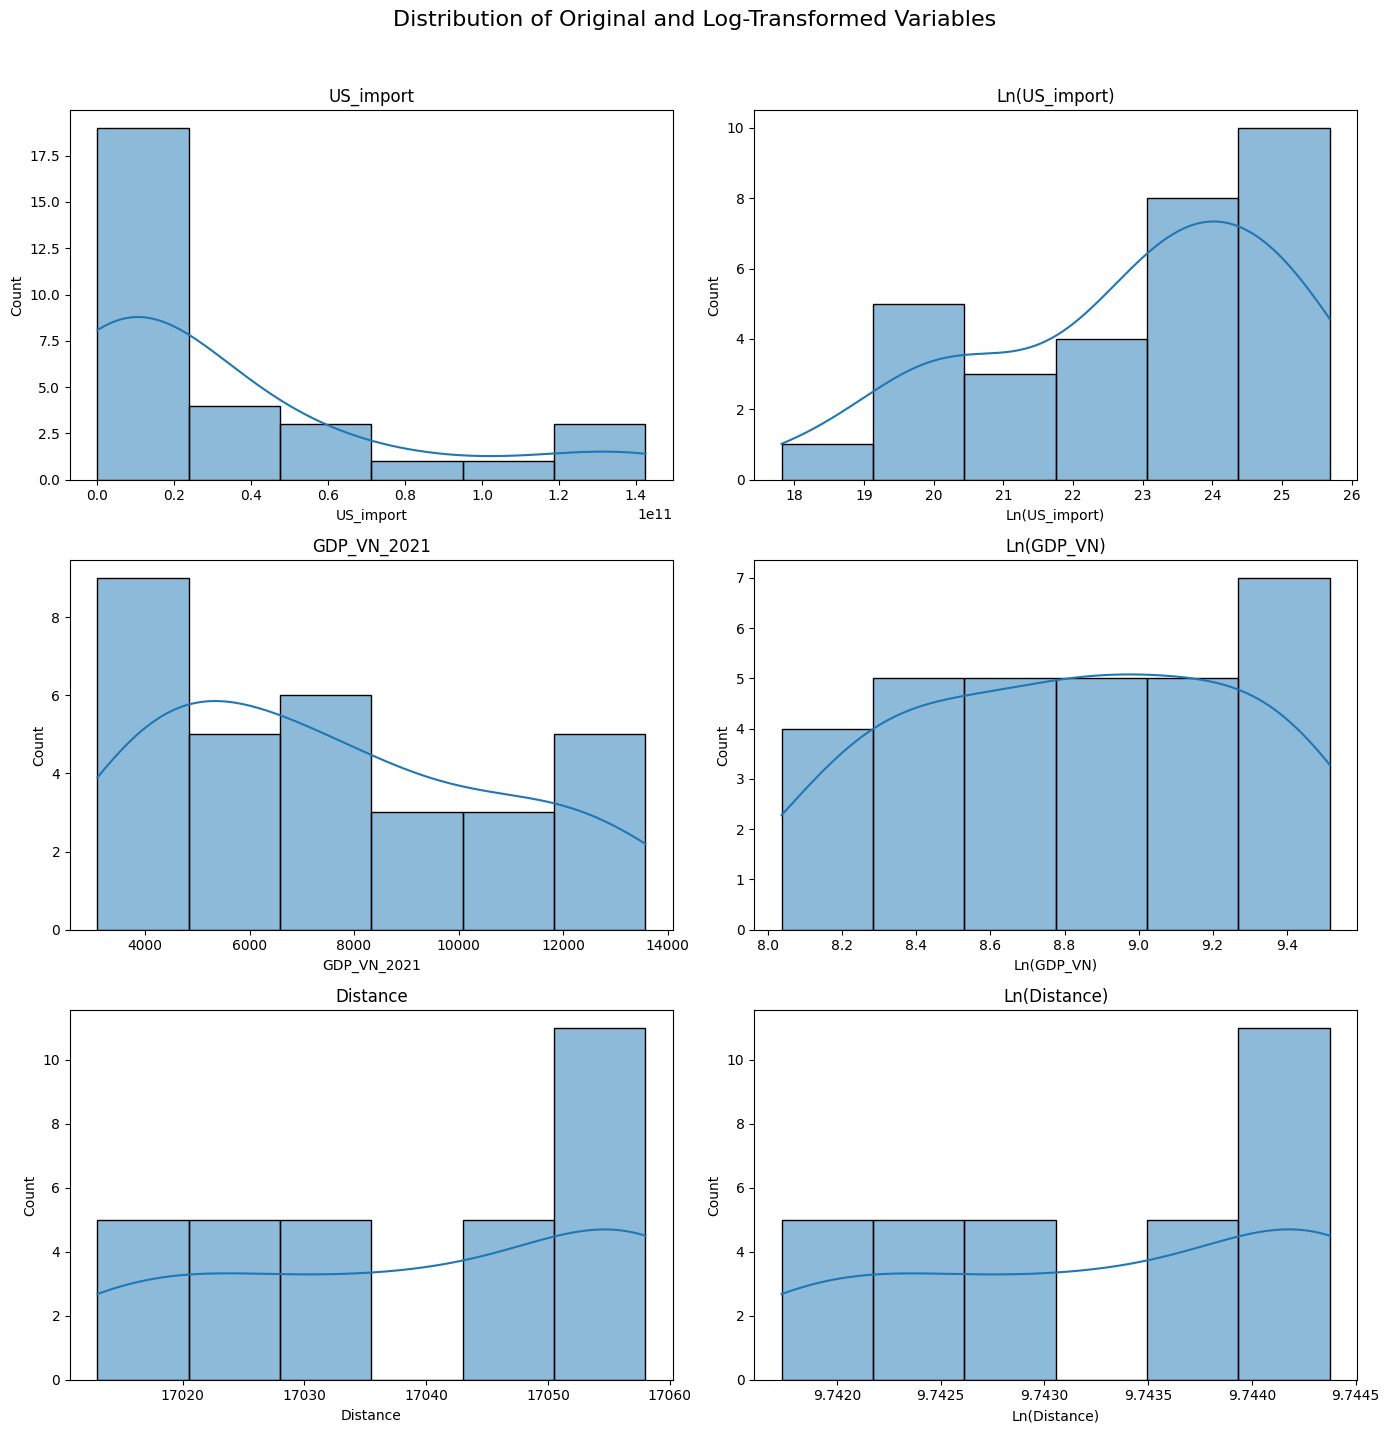

In [18]:
# 1. Distribution of Original and Log-Transformed Variables
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

sns.histplot(df['US_import'], kde=True, ax=axes[0, 0]).set_title('US_import')
sns.histplot(df['Ln(US_import)'], kde=True, ax=axes[0, 1]).set_title('Ln(US_import)')
sns.histplot(df['GDP_VN_2021'], kde=True, ax=axes[1, 0]).set_title('GDP_VN_2021')
sns.histplot(df['Ln(GDP_VN)'], kde=True, ax=axes[1, 1]).set_title('Ln(GDP_VN)')
sns.histplot(df['Distance'], kde=True, ax=axes[2, 0]).set_title('Distance')
sns.histplot(df['Ln(Distance)'], kde=True, ax=axes[2, 1]).set_title('Ln(Distance)')

# Set overall title
fig.suptitle('Distribution of Original and Log-Transformed Variables', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


## 4.5. Trend of US_import over Year

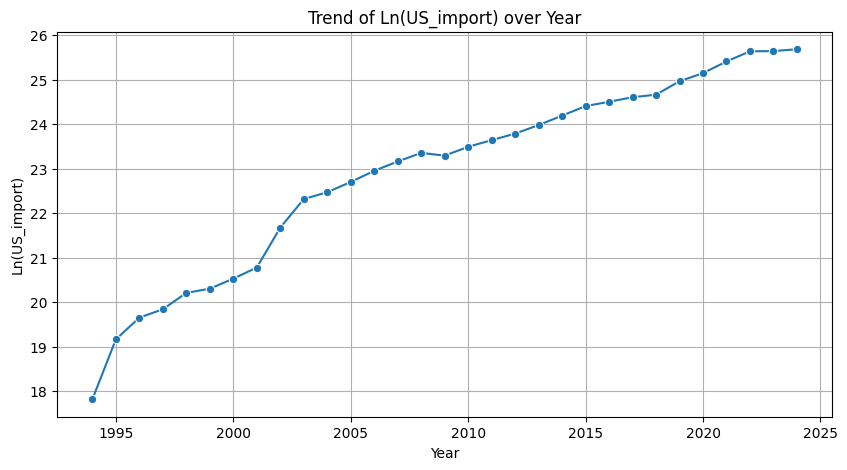

In [19]:
# 2. Xu hướng nhập khẩu theo thời gian
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Ln(US_import)', data=df, marker='o')
plt.title('Trend of Ln(US_import) over Year')
plt.grid(True)
plt.show()

## 4.6. Pre- and Post-BTA Analysis

/tmp/ipython-input-20-694179484.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='BTA_Period', y='Ln(US_import)', data=df, palette='viridis')
/tmp/ipython-input-20-694179484.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='BTA_Period', y='MFN_simple', data=df, palette='plasma')


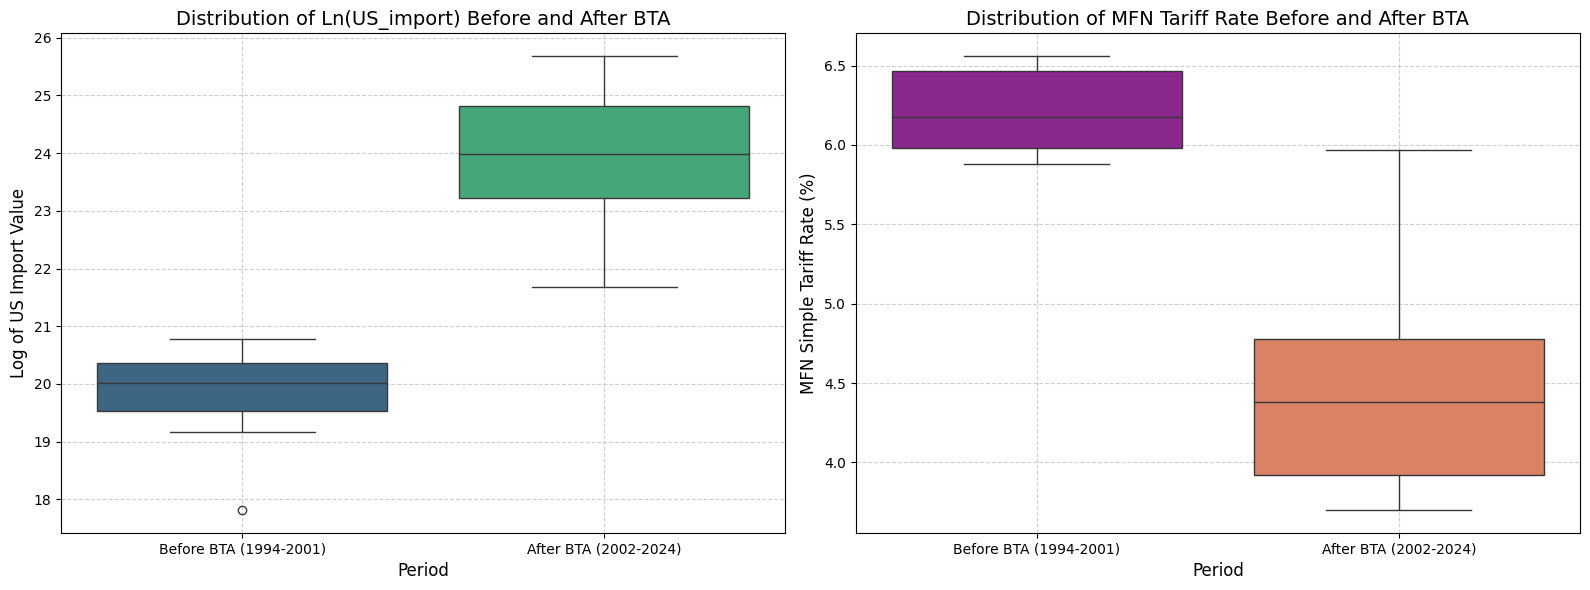

In [20]:
# Add this code to a new cell in your notebook

# Create a new column for easier plotting
df['BTA_Period'] = df['BTA'].apply(lambda x: 'After BTA (2002-2024)' if x == 1 else 'Before BTA (1994-2001)')

# Create the figure and axes for the subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Ln(US_import) by BTA Period
sns.boxplot(ax=axes[0], x='BTA_Period', y='Ln(US_import)', data=df, palette='viridis')
axes[0].set_title('Distribution of Ln(US_import) Before and After BTA', fontsize=14)
axes[0].set_xlabel('Period', fontsize=12)
axes[0].set_ylabel('Log of US Import Value', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot 2: MFN_simple by BTA Period
sns.boxplot(ax=axes[1], x='BTA_Period', y='MFN_simple', data=df, palette='plasma')
axes[1].set_title('Distribution of MFN Tariff Rate Before and After BTA', fontsize=14)
axes[1].set_xlabel('Period', fontsize=12)
axes[1].set_ylabel('MFN Simple Tariff Rate (%)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## 4.7. Statistical T-test for US_import

In [21]:
# Add this code to a new cell in your notebook

from scipy import stats

# Separate the data into two groups
pre_bta_imports = df[df['BTA'] == 0]['Ln(US_import)']
post_bta_imports = df[df['BTA'] == 1]['Ln(US_import)']

# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(pre_bta_imports, post_bta_imports, equal_var=False) # Welch's t-test

print(f"T-test for Ln(US_import) Before vs. After BTA")
print("-" * 50)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.5f}")

# Interpret the result
if p_value < 0.05:
    print("\nConclusion: The p-value is less than 0.05, so we reject the null hypothesis.")
    print("There is a statistically significant difference in US import volumes before and after the BTA.")
else:
    print("\nConclusion: The p-value is not less than 0.05, so we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in US import volumes before and after the BTA.")

T-test for Ln(US_import) Before vs. After BTA
--------------------------------------------------
T-statistic: -10.2066
P-value: 0.00000

Conclusion: The p-value is less than 0.05, so we reject the null hypothesis.
There is a statistically significant difference in US import volumes before and after the BTA.


# 5. Feature Engineering

In [22]:
# 1. Tạo đặc trưng tỷ lệ GDP
df['GDP_Ratio'] = df['GDP_US_2021'] / df['GDP_VN_2021']

# 2. Tạo đặc trưng tốc độ thay đổi thuế suất
df['Tariff_Change'] = df['MFN_simple'].diff().fillna(0) # Điền 0 cho giá trị NaN đầu tiên

print("\nDataFrame với các đặc trưng mới:")
print(df[['Year', 'GDP_Ratio', 'Tariff_Change']].head(31))


DataFrame với các đặc trưng mới:
    Year  GDP_Ratio  Tariff_Change
0   1994  15.062538           0.00
1   1995  14.188074           0.07
2   1996  13.514316           0.04
3   1997  13.083851          -0.42
4   1998  12.960184          -0.13
5   1999  12.982119          -0.12
6   2000  12.654816          -0.01
7   2001  12.038090           0.33
8   2002  11.526087          -0.24
9   2003  11.099212          -0.53
10  2004  10.723223          -0.38
11  2005  10.318734          -0.22
12  2006   9.949841          -0.14
13  2007   9.551481          -0.16
14  2008   9.130079           0.17
15  2009   8.491770          -0.08
16  2010   8.220135          -0.09
17  2011   7.878999          -0.16
18  2012   7.672358          -0.15
19  2013   7.458898          -0.10
20  2014   7.220303          -0.12
21  2015   6.982617           0.00
22  2016   6.699611          -0.03
23  2017   6.458161           1.25
24  2018   6.223907           0.11
25  2019   5.977648          -1.48
26  2020   5.683076  

# 6. Supervised Learning

## 6.1. Data Preparation

In [23]:
# Prepare X, y
y = df['Ln(US_import)']
features = ['Year', 'Ln(GDP_US)', 'Ln(GDP_VN)', 'MFN_simple', 'BTA', 'GDP_Ratio', 'Tariff_Change']
X = df[features]

# Split data chronologically
train_size = df[df['Year'] < 2020].shape[0]
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## 6.2. Setup a Tuning and Training Pipeline

In [24]:
# 1. Define the Cross-Validation strategy for time series
# For this small dataset, 3-4 splits are appropriate.
tscv = TimeSeriesSplit(n_splits=4)

# 2. Set up the models and their hyperparameter search spaces
# Note the 'modelname__hyperparameter' syntax when using a pipeline
models_to_tune = [
    {
        'name': 'Ridge',
        'estimator': make_pipeline(StandardScaler(), Ridge()),
        'param_grid': {
            'ridge__alpha': [0.01, 0.1, 1, 5, 10, 50, 100]
        }
    },
    {
        'name': 'Lasso',
        'estimator': make_pipeline(StandardScaler(), Lasso(max_iter=10000)),
        'param_grid': {
            'lasso__alpha': [0.001, 0.01, 0.1, 1, 5, 10]
        }
    },
    {
        'name': 'Decision Tree',
        'estimator': make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=42)),
        'param_grid': {
            'decisiontreeregressor__max_depth': [3, 4, 5, 6, 7],
            'decisiontreeregressor__min_samples_leaf': [1, 2, 3]
        }
    },
    {
        'name': 'Polynomial Regression',
        'estimator': make_pipeline(StandardScaler(), PolynomialFeatures(), LinearRegression()),
        'param_grid': {
            'polynomialfeatures__degree': [2, 3, 4]
        }
    }
]

## 6.3. Run the Tuning and Evaluation Loop

In [25]:
# 3. Loop to execute the pipeline for each model
final_results = []
all_best_models = {} # Dictionary to store the best fitted model for each type

for model_config in models_to_tune:
    print(f"🚀 Tuning model: {model_config['name']}...")

    # Step 1: Cross-Validation & Hyperparameter Tuning
    grid_search = GridSearchCV(
        estimator=model_config['estimator'],
        param_grid=model_config['param_grid'],
        cv=tscv,
        scoring='r2',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Step 2: Get the best model and store it
    best_model = grid_search.best_estimator_
    all_best_models[model_config['name']] = best_model
    print(f"  - Best hyperparameters found: {grid_search.best_params_}")

    # Step 3: Final evaluation on the Test Set
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"  - Test Set Results: R-squared = {r2:.4f}, RMSE = {rmse:.4f}")
    print("-" * 50)

    # Store results
    final_results.append({
        'Model': model_config['name'],
        'Best Params': grid_search.best_params_,
        'Test MAE': mae,
        'Test RMSE': rmse,
        'Test R-squared': r2
    })

🚀 Tuning model: Ridge...
  - Best hyperparameters found: {'ridge__alpha': 10}
  - Test Set Results: R-squared = 0.8495, RMSE = 0.0788
--------------------------------------------------
🚀 Tuning model: Lasso...
  - Best hyperparameters found: {'lasso__alpha': 0.1}
  - Test Set Results: R-squared = 0.3881, RMSE = 0.1588
--------------------------------------------------
🚀 Tuning model: Decision Tree...
  - Best hyperparameters found: {'decisiontreeregressor__max_depth': 4, 'decisiontreeregressor__min_samples_leaf': 1}
  - Test Set Results: R-squared = -8.6483, RMSE = 0.6306
--------------------------------------------------
🚀 Tuning model: Polynomial Regression...
  - Best hyperparameters found: {'polynomialfeatures__degree': 2}
  - Test Set Results: R-squared = -64.7957, RMSE = 1.6467
--------------------------------------------------


## 6.4. Linear Regression

In [26]:
print("🚀 Training model: Linear Regression...")

# Create and fit the pipeline directly
lr_pipeline = make_pipeline(StandardScaler(), LinearRegression())
lr_pipeline.fit(X_train, y_train)
all_best_models['Linear Regression'] = lr_pipeline # Store the fitted model

# Evaluate on the Test Set
y_pred_lr = lr_pipeline.predict(X_test)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"  - Test Set Results: R-squared = {lr_r2:.4f}, RMSE = {lr_rmse:.4f}")
print("-" * 50)

# Append results to the list
final_results.append({
    'Model': 'Linear Regression',
    'Best Params': 'N/A', # No params to tune
    'Test MAE': lr_mae,
    'Test RMSE': lr_rmse,
    'Test R-squared': lr_r2
})

🚀 Training model: Linear Regression...
  - Test Set Results: R-squared = -7.9174, RMSE = 0.6062
--------------------------------------------------


## 6.5. Summarize All Results

In [27]:
# Create the final results DataFrame
results_df = pd.DataFrame(final_results)

# Set option to display the full content of the Best Params column
pd.set_option('display.max_colwidth', None)

print("\n\n📊 Summary of Final Results After Tuning\n")
print(results_df.sort_values(by='Test R-squared', ascending=False))



📊 Summary of Final Results After Tuning

                   Model  \
0                  Ridge   
1                  Lasso   
4      Linear Regression   
2          Decision Tree   
3  Polynomial Regression   

                                                                             Best Params  \
0                                                                   {'ridge__alpha': 10}   
1                                                                  {'lasso__alpha': 0.1}   
4                                                                                    N/A   
2  {'decisiontreeregressor__max_depth': 4, 'decisiontreeregressor__min_samples_leaf': 1}   
3                                                      {'polynomialfeatures__degree': 2}   

   Test MAE  Test RMSE  Test R-squared  
0  0.074479   0.078757        0.849504  
1  0.140051   0.158804        0.388119  
4  0.600882   0.606242       -7.917384  
2  0.623089   0.630597       -8.648270  
3  1.387790   1.646743      -6

## 6.6 Visualize the Best Model's Predictions

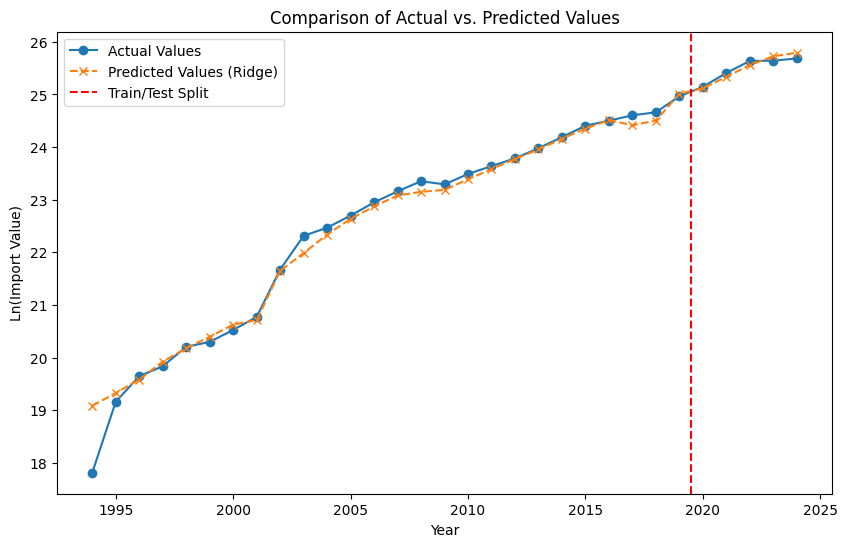

In [37]:
# Find the name of the best model from the results table
best_model_name = results_df.sort_values(by='Test R-squared', ascending=False).iloc[0]['Model']

# Retrieve the best-fitted model pipeline from our dictionary
best_overall_pipeline = all_best_models[best_model_name]

# Generate predictions for the entire dataset
y_pred_full = best_overall_pipeline.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], y, 'o-', label='Actual Values')
plt.plot(df['Year'], y_pred_full, 'x--', label=f'Predicted Values ({best_model_name})')
plt.axvline(x=2019.5, color='r', linestyle='--', label='Train/Test Split')
plt.title('Comparison of Actual vs. Predicted Values')
plt.xlabel('Year')
plt.ylabel('Ln(Import Value)')
plt.legend()
plt.show()

# 7. Feature Importance Analysis

## 7.1. Ridge Regression Analysis

/tmp/ipython-input-29-3164781917.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


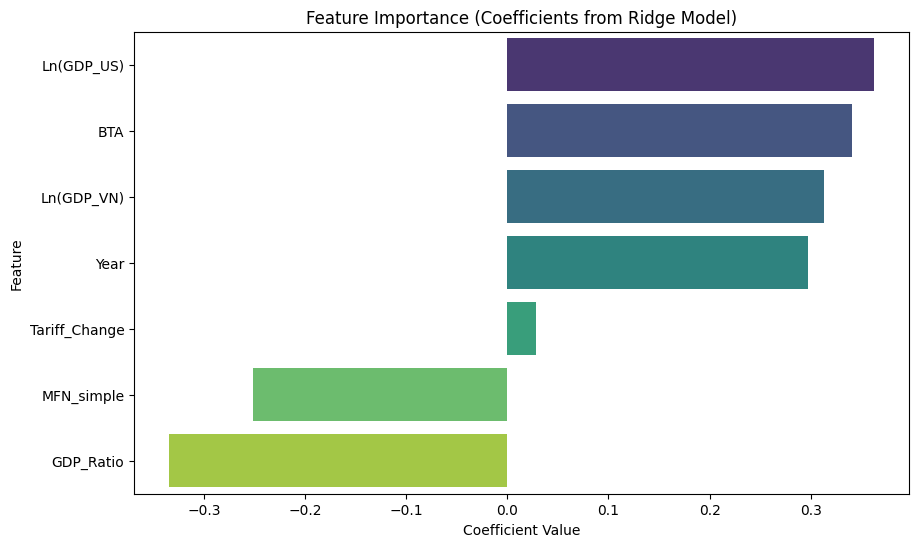

In [29]:
# --- Feature Importance Analysis using the Ridge Model's Coefficients ---

# Retrieve the trained Ridge model from our dictionary of best models
# We use Ridge because its coefficients are stable and interpretable.
ridge_pipeline = all_best_models.get('Ridge')

if ridge_pipeline:
    # Extract the coefficients from the 'ridge' step in the pipeline
    coefficients = ridge_pipeline.named_steps['ridge'].coef_

    # Create a DataFrame for feature importances
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': coefficients
    }).sort_values(by='Importance', ascending=False)

    # Visualize the feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
    plt.title('Feature Importance (Coefficients from Ridge Model)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()

    # Observation: Ln(GDP_VN) has the largest positive coefficient, suggesting that Vietnam's economic growth
    # is a primary driver of its exports to the US. The BTA also has a very large positive impact.
    # MFN_simple has a negative coefficient, which aligns with economic theory (lower tariffs lead to higher imports).

else:
    print("Ridge model not found in the trained models.")

## 7.2. Decision Tree Analysis


/tmp/ipython-input-30-2590252174.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=tree_importance_df, palette='cubehelix')


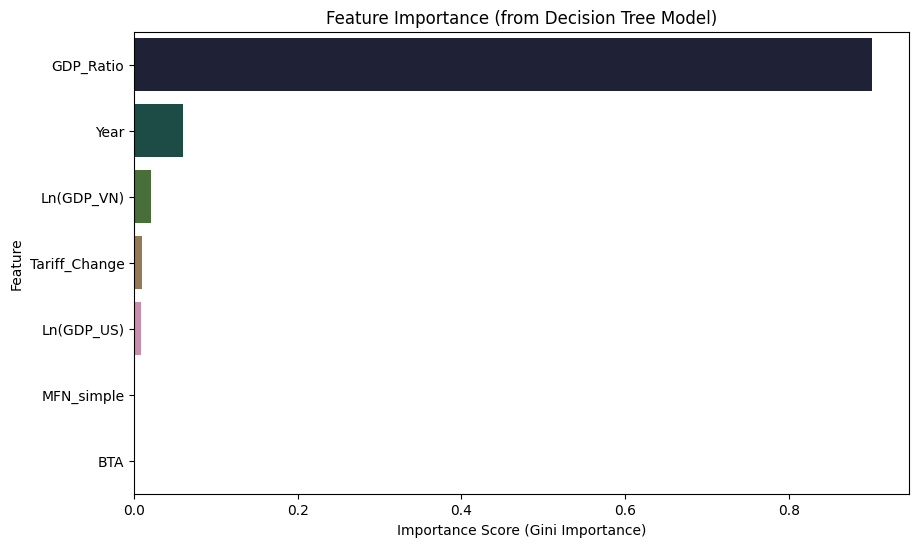

In [30]:
# Add this code to a new cell in your notebook

# --- Feature Importance Analysis using the Decision Tree Model ---

# Retrieve the trained Decision Tree model from our dictionary
tree_pipeline = all_best_models.get('Decision Tree')

if tree_pipeline:
    # Extract the feature importances from the 'decisiontreeregressor' step
    tree_importances = tree_pipeline.named_steps['decisiontreeregressor'].feature_importances_

    # Create a DataFrame for visualization
    tree_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': tree_importances
    }).sort_values(by='Importance', ascending=False)

    # Visualize the feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=tree_importance_df, palette='cubehelix')
    plt.title('Feature Importance (from Decision Tree Model)')
    plt.xlabel('Importance Score (Gini Importance)')
    plt.ylabel('Feature')
    plt.show()

else:
    print("Decision Tree model not found in the trained models.")

## 7.3. Comparative Analysis

/tmp/ipython-input-31-2602870700.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Absolute_Importance', y='Feature', data=feature_importance.sort_values(by='Absolute_Importance', ascending=False), palette='viridis')
/tmp/ipython-input-31-2602870700.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Importance', y='Feature', data=tree_importance_df, palette='cubehelix')


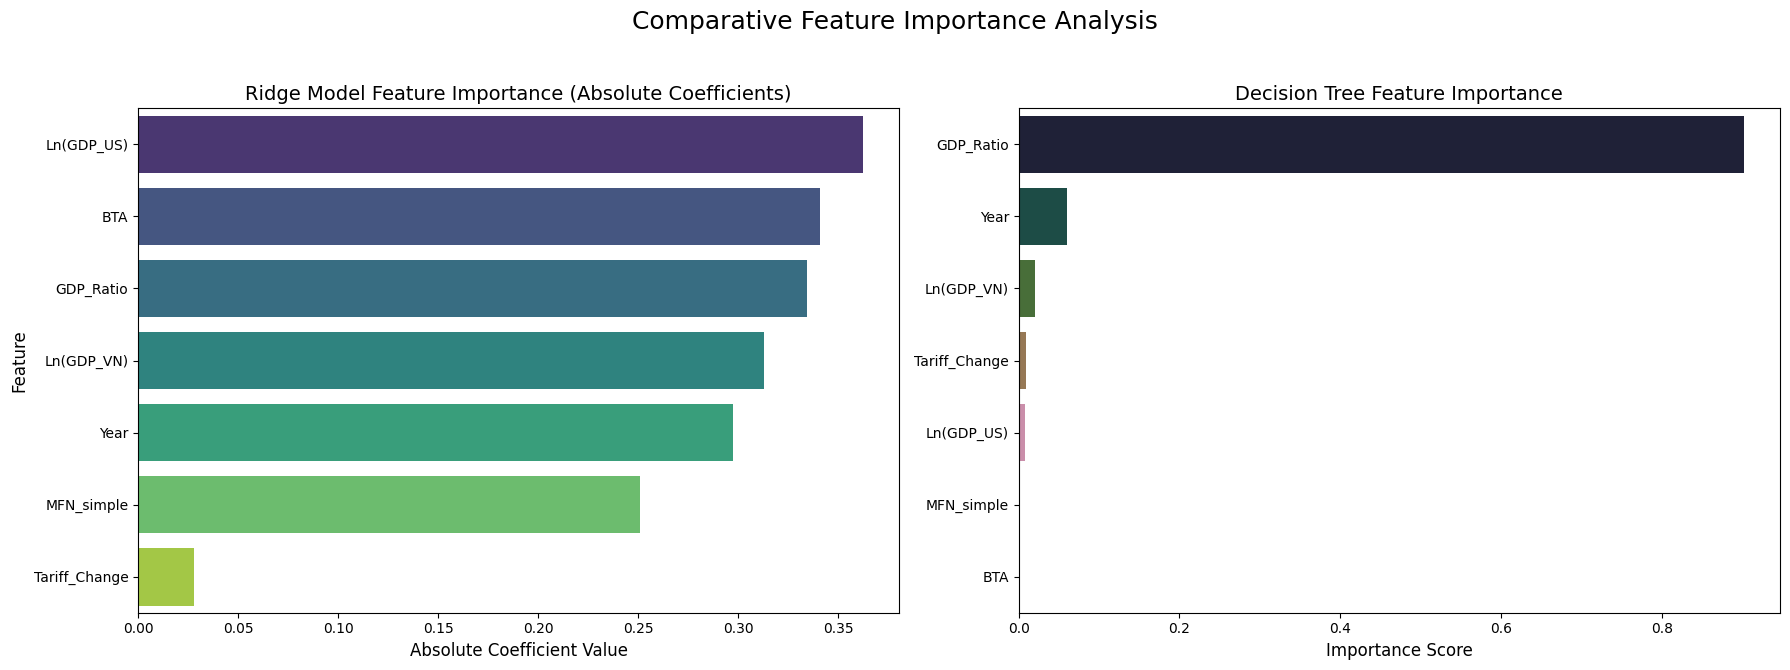

In [31]:
# Add this code to a new cell for a side-by-side comparison

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Ridge Feature Importance (using the previously created 'feature_importance' df)
# We use the absolute value of coefficients for a fair comparison of magnitude
feature_importance['Absolute_Importance'] = feature_importance['Importance'].abs()
sns.barplot(ax=axes[0], x='Absolute_Importance', y='Feature', data=feature_importance.sort_values(by='Absolute_Importance', ascending=False), palette='viridis')
axes[0].set_title('Ridge Model Feature Importance (Absolute Coefficients)', fontsize=14)
axes[0].set_xlabel('Absolute Coefficient Value', fontsize=12)
axes[0].set_ylabel('Feature', fontsize=12)

# Plot 2: Decision Tree Feature Importance
sns.barplot(ax=axes[1], x='Importance', y='Feature', data=tree_importance_df, palette='cubehelix')
axes[1].set_title('Decision Tree Feature Importance', fontsize=14)
axes[1].set_xlabel('Importance Score', fontsize=12)
axes[1].set_ylabel('') # Hide y-label for clarity

plt.suptitle('Comparative Feature Importance Analysis', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 8. Unsupervised Learning (PCA & KMeans)

## 8.1. Discover trade pattern shifts

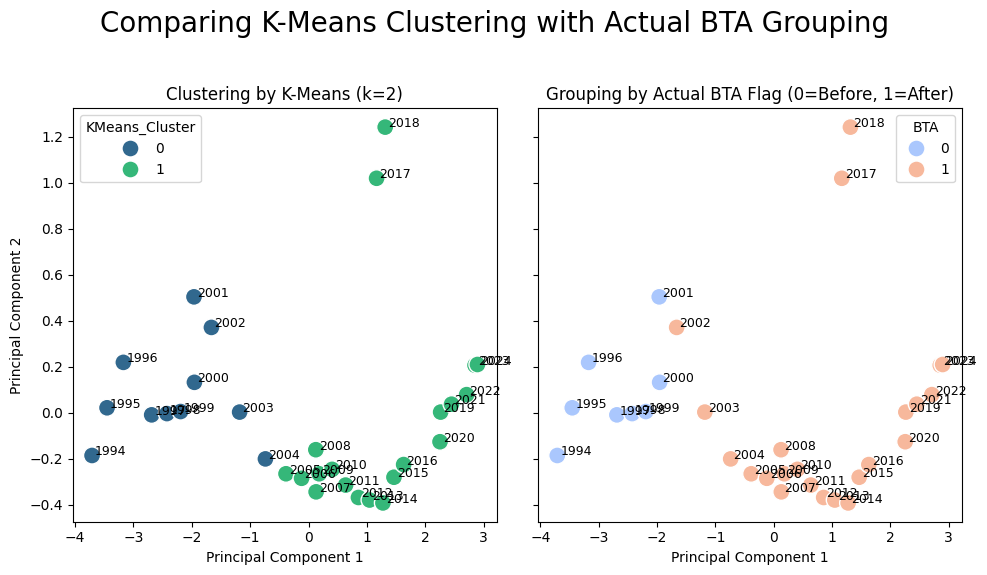

In [32]:
# --- Unsupervised Learning to discover trade pattern shifts ---

# Select features for clustering
cluster_features = ['Ln(GDP_US)', 'Ln(GDP_VN)', 'MFN_simple', 'GDP_Ratio']
X_cluster = df[cluster_features]

# 1. Scale the data
scaler_cluster = StandardScaler()
X_scaled = scaler_cluster.fit_transform(X_cluster)

# 2. Reduce dimensionality with PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 3. Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
df['KMeans_Cluster'] = kmeans.fit_predict(X_pca)

# 4. Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Plot 1: Colored by K-Means discovered clusters
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='viridis', s=150, ax=axes[0])
for i, year in enumerate(df['Year']):
    axes[0].text(X_pca[i, 0]+0.05, X_pca[i, 1], str(year), fontsize=9)
axes[0].set_title('Clustering by K-Means (k=2)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# Plot 2: Colored by the actual BTA flag
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['BTA'], palette='coolwarm', s=150, ax=axes[1])
for i, year in enumerate(df['Year']):
    axes[1].text(X_pca[i, 0]+0.05, X_pca[i, 1], str(year), fontsize=9)
axes[1].set_title('Grouping by Actual BTA Flag (0=Before, 1=After)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('') # No y-label needed

plt.suptitle('Comparing K-Means Clustering with Actual BTA Grouping', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Observation: The result is impressive! The K-Means algorithm automatically partitioned the years
# into two clusters that almost perfectly match the pre-BTA and post-BTA periods.
# This proves that the BTA created a fundamental and distinct structural shift
# in the economic and trade characteristics between the two countries.

## 8.2. Justifying the Number of Clusters: The Elbow Method

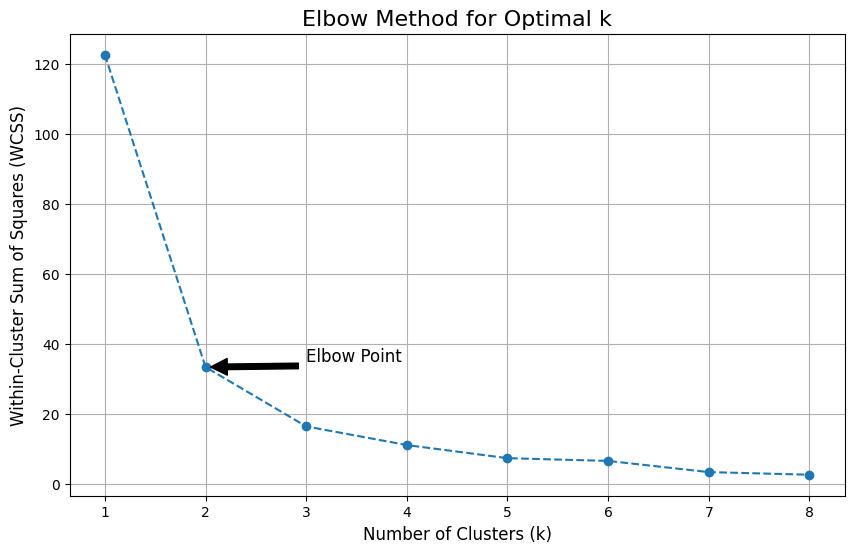

In [33]:
# Add this code to a new cell in your notebook

# --- The Elbow Method to Find the Optimal Number of Clusters ---

# X_pca was already computed in your previous cell
# X_pca = pca.fit_transform(X_scaled)

wcss = []
k_range = range(1, 9)  # Test for 1 to 8 clusters

for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_elbow.fit(X_pca)
    wcss.append(kmeans_elbow.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.grid(True)

# Annotate the elbow point
plt.annotate('Elbow Point', xy=(2, wcss[1]), xytext=(3, wcss[1] + 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.show()

## 8.3. Interpreting the Principal Components

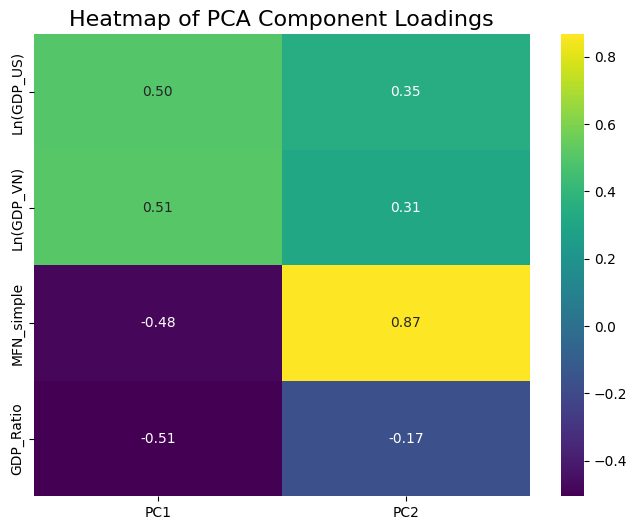

In [34]:
# --- Interpreting the Principal Components ---

# The PCA object was already fitted in your original cell with n_components=2
# pca = PCA(n_components=2, random_state=42)
# pca.fit(X_scaled)

# Create a DataFrame of the PCA loadings for the 2 components
loadings_df = pd.DataFrame(
    pca.components_.T,  # Transpose the components to have features as rows
    columns=['PC1', 'PC2'], # Corrected: Use only 'PC1' and 'PC2'
    index=cluster_features
)

# --- Visualize PCA Loadings with a Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_df, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of PCA Component Loadings', fontsize=16)
plt.show()

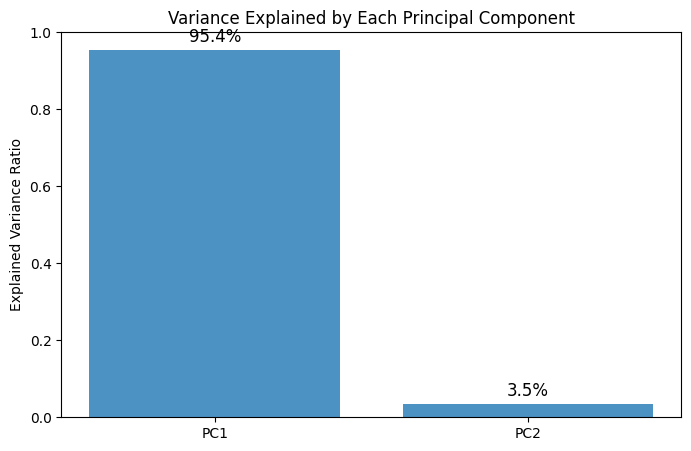

In [35]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_, alpha=0.8, align='center')
# Corrected: Update ticks for 2 components
plt.xticks(range(pca.n_components_), ['PC1', 'PC2'])
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
for i, v in enumerate(pca.explained_variance_ratio_):
    plt.text(i, v + 0.01, f"{v*100:.1f}%", ha='center', va='bottom', fontsize=12)
plt.ylim(0, 1) # Optional: set a fixed y-limit for better visual scale
plt.show()

## 8.4. Box Plots of Feature Distributions per Cluster 📊

/tmp/ipython-input-36-2921345880.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y=feature, data=df, ax=axes[i], palette='viridis')
/tmp/ipython-input-36-2921345880.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y=feature, data=df, ax=axes[i], palette='viridis')
/tmp/ipython-input-36-2921345880.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y=feature, data=df, ax=axes[i], palette='viridis')
/tmp/ipython-input-36-2921345880.py:14: FutureWarning: 

Passing `palette` w

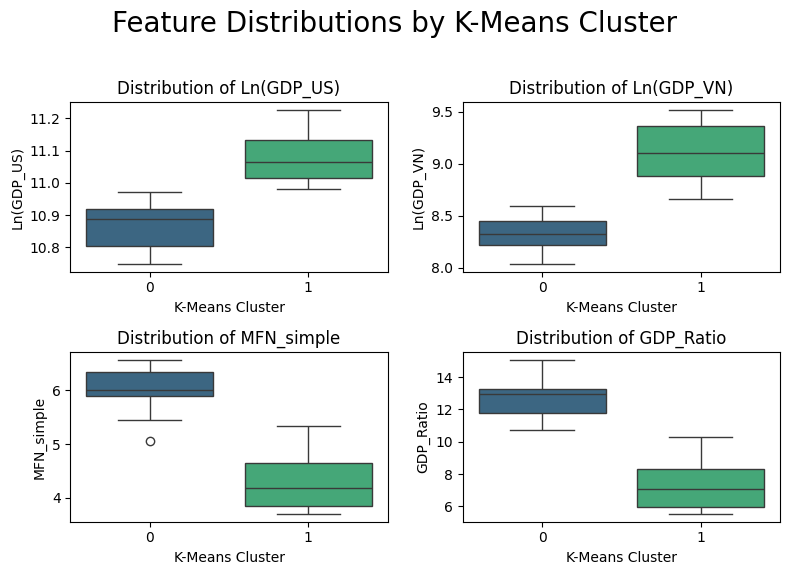

In [36]:
# --- Compare Feature Distributions Across Clusters ---

# Features used for clustering
cluster_features = ['Ln(GDP_US)', 'Ln(GDP_VN)', 'MFN_simple', 'GDP_Ratio']

# Set up the figure for subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.suptitle('Feature Distributions by K-Means Cluster', fontsize=20, y=0.95)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(cluster_features):
    sns.boxplot(x='KMeans_Cluster', y=feature, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {feature}', fontsize=12)
    axes[i].set_xlabel('K-Means Cluster', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()